<a href="https://colab.research.google.com/github/Tharungovind/GOVINDTHARUN_INFO5731_FALL2024/blob/main/Govind_Tharun_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
# Load reviews from a CSV file


import csv
def load_reviews_from_csv(file_path):
    reviews = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            if row:
                reviews.append(row[0])
    return reviews    [:100]

In [4]:
# Write your code here
import re
from collections import defaultdict



# Replace 'reviews.csv' with the path to your CSV file
file_path = '/content/Oppenheimer_reviews.csv'
reviews = load_reviews_from_csv(file_path)

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

# (1) Count the frequency of all the N-grams (N=3)
def generate_ngrams(text, n=3):
    words = tokenize(text.lower())
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

ngram_counts = defaultdict(int)
for review in reviews:
    ngrams = generate_ngrams(review, n=3)
    for ngram in ngrams:
        ngram_counts[ngram] += 1

print("3-gram Frequencies:")
for ngram, count in ngram_counts.items():
    print(f"{ngram}: {count}")

# (2) bigram probabilities
def generate_bigrams(text):
    words =  tokenize(text.lower())
    bigrams = [tuple(words[i:i+2]) for i in range(len(words)-1)]
    return bigrams

bigram_counts = defaultdict(int)
unigram_counts = defaultdict(int)

for review in reviews:
    words =  tokenize(review.lower())
    for word in words:
        unigram_counts[word] += 1
    bigrams = generate_bigrams(review)
    for bigram in bigrams:
        bigram_counts[bigram] += 1

print("\nBigram Probabilities:")
for bigram, count in bigram_counts.items():
    probability = count / unigram_counts[bigram[0]]
    print(f"{bigram}: {probability:.2f}")

# (3) Extract noun phrases and calculate relative probabilities
def extract_noun_phrases(text):
    pattern = r'\b(?:\w+ ){0,2}\w+\b'
    words = re.findall(pattern, text)
    return [phrase for phrase in words if re.match(r'\b\w+\b', phrase)]

noun_phrase_counts = defaultdict(int)
review_noun_phrases = []

for review in reviews:
    noun_phrases = extract_noun_phrases(review)
    review_noun_phrases.append(noun_phrases)
    for phrase in noun_phrases:
        noun_phrase_counts[phrase] += 1

max_freq = max(noun_phrase_counts.values())

print("\nNoun Phrase Relative Probabilities:")
print(f"{'Review #':<10} | {' | '.join(noun_phrase_counts.keys())}")
for i, phrases in enumerate(review_noun_phrases):
    print(f"Review {i+1:<8} | ", end="")
    for phrase in noun_phrase_counts.keys():
        rel_prob = noun_phrase_counts[phrase] / max_freq if phrase in phrases else 0
        print(f"{rel_prob:.2f} | ", end="")
    print()






Streaming output truncated to the last 5000 lines.
('powerful', 'government'): 0.50
('government', 'officials'): 0.33
('officials', "it's"): 1.00
("it's", 'hard'): 0.03
('hard', 'to'): 0.75
('to', 'imagine'): 0.00
('imagine', 'any'): 0.50
('any', 'other'): 0.17
('other', 'director'): 0.06
('director', 'trying'): 0.17
('trying', 'to'): 1.00
('to', 'convey'): 0.00
('convey', 'so'): 1.00
('so', 'much'): 0.04
('much', 'information'): 0.06
('information', 'to'): 0.50
('to', 'their'): 0.00
('their', 'audience'): 0.07
('audience', 'in'): 0.08
('in', 'such'): 0.01
('such', 'a'): 0.71
('a', 'fashion'): 0.00
('fashion', 'but'): 0.33
('but', 'nolan'): 0.02
('nolan', 'manages'): 0.02
('to', 'work'): 0.01
('work', 'his'): 0.15
('his', 'magic'): 0.01
('magic', 'in'): 1.00
('best', 'way'): 0.04
('way', 'possible'): 0.06
('possible', 'always'): 0.50
('always', 'striking'): 0.33
('striking', 'the'): 1.00
('the', 'perfect'): 0.00
('perfect', 'balance'): 0.20
('balance', 'of'): 1.00
('of', 'showcasing'):

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [5]:
# Calculate term frequency (TF) for each document
def compute_tf(doc):
    tf = defaultdict(int)
    words =  tokenize((doc))
    for word in words:
        tf[word] += 1
    total_words = len(words)
    for word in tf:
        tf[word] /= total_words
    return tf


In [6]:
# Calculate inverse document frequency (IDF) for all terms in the corpus
def compute_idf(documents):
    num_docs = len(documents)
    idf = defaultdict(int)
    for doc in documents:
        words = set(tokenize(doc))
        for word in words:
            idf[word] += 1
    for word in idf:
        idf[word] = math.log(num_docs / (1 + idf[word]))
    return idf

In [7]:
# Calculate the TF-IDF matrix for all documents
def compute_tfidf_matrix(documents):
    idf = compute_idf(documents)
    tfidf_matrix = []
    for doc in documents:
        tf = compute_tf(doc)
        tfidf = {word: tf[word] * idf[word] for word in tf}
        tfidf_matrix.append(tfidf)
    return tfidf_matrix, idf

In [8]:
# Calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    dot_product = sum(vec1[word] * vec2[word] for word in intersection)

    m1 = math.sqrt(sum(val**2 for val in vec1.values()))
    m2 = math.sqrt(sum(val**2 for val in vec2.values()))

    if not m1 or not m2:
        return 0.0

    return dot_product / (m1 * m2)

In [9]:
# Write your code here
import math
import re
from collections import defaultdict


# tokenize and lower case
def preprocess(text):
    return re.findall(r'\b\w+\b', text.lower())

# Create a TF-IDF vector for the query
def compute_query_tfidf(query, idf):
    tf = compute_tf(query)
    query_tfidf = {word: tf[word] * idf.get(word, 0) for word in tf}
    return query_tfidf

file_path = '/content/Oppenheimer_reviews.csv'
documents = load_reviews_from_csv(file_path)

# Compute tf-IDF-matrix
tfidf_matrix, idf = compute_tfidf_matrix(documents)

query = "The narration  of the movie is slow but the climax is awesome"
query_tfidf = compute_query_tfidf(query, idf)

# Rank documents based on cosine similarity to the query
document_scores = [(i, cosine_similarity(query_tfidf, tfidf)) for i, tfidf in enumerate(tfidf_matrix)]
document_scores.sort(key=lambda x: x[1], reverse=True)

# Print ranked documents
print("Ranking of documents with respect to the query:")
for doc_index, score in document_scores:
    print(f"Document {doc_index + 1}: Score = {score:.4f}")






Ranking of documents with respect to the query:
Document 19: Score = 0.0727
Document 44: Score = 0.0727
Document 69: Score = 0.0727
Document 94: Score = 0.0727
Document 17: Score = 0.0360
Document 42: Score = 0.0360
Document 67: Score = 0.0360
Document 92: Score = 0.0360
Document 6: Score = 0.0271
Document 31: Score = 0.0271
Document 56: Score = 0.0271
Document 81: Score = 0.0271
Document 7: Score = 0.0156
Document 32: Score = 0.0156
Document 57: Score = 0.0156
Document 82: Score = 0.0156
Document 10: Score = 0.0140
Document 35: Score = 0.0140
Document 60: Score = 0.0140
Document 85: Score = 0.0140
Document 11: Score = 0.0116
Document 36: Score = 0.0116
Document 61: Score = 0.0116
Document 86: Score = 0.0116
Document 12: Score = 0.0097
Document 37: Score = 0.0097
Document 62: Score = 0.0097
Document 87: Score = 0.0097
Document 23: Score = 0.0085
Document 48: Score = 0.0085
Document 73: Score = 0.0085
Document 98: Score = 0.0085
Document 13: Score = 0.0082
Document 38: Score = 0.0082
Do

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [10]:
def visualize_word_embeddings(model, num_words=200):
    words = list(model.wv.index_to_key[:num_words])
    word_vectors = np.array([model.wv[word] for word in words])

    #t-SNE for dimensionality reduction to visualize features
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(14, 10))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=12)

    plt.title('2D Visualization of Word Embeddings')
    plt.xlabel('Component  1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

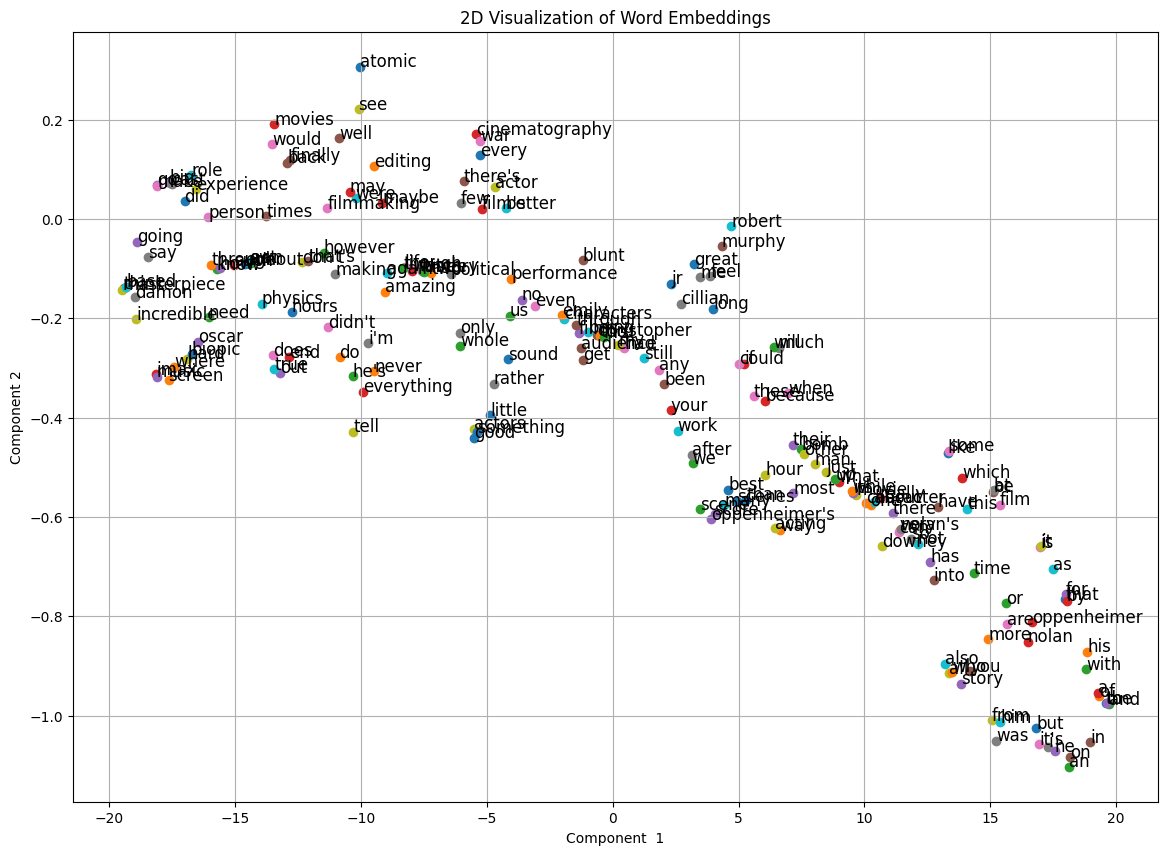

In [11]:
# Write your code here

import re
import csv
import gensim
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

documents = load_reviews_from_csv(file_path)

# Preprocess  documents by tokeninzing
sentences = [tokenize(doc) for doc in documents]

# (1) Train a 300-dimensional word embedding model (Word2Vec)
embedding_dim = 300
word2vec_model = Word2Vec(sentences, vector_size=embedding_dim, window=5, min_count=2, workers=4)


# Visualize the embeddings
visualize_word_embeddings(word2vec_model)




## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/Tharungovind/GOVINDTHARUN_INFO5731_FALL2024/blob/main/Review%20Sentiments.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

#Answer

This assignment is both challenging and rewarding, offering a deep dive into NLP by implementing models like TF-IDF and word embeddings from scratch. While understanding theoretical concepts and ensuring efficient coding can be difficult, the hands-on experience and visualization aspects make it enjoyable and insightful. The time needed varies, but with moderate experience in programming, one week is reasonable. Overall, it’s a great way to build practical skills and a solid understanding of fundamentals of  NLP tasks.